In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ams_2014_electron = pd.read_csv('ams-2014-electron.csv')
ams_2014_electron = ams_2014_electron[(ams_2014_electron["Emed"] > 20)]
#ams_2014_electron = ams_2014_electron[(ams_2014_electron["Emed"] < 290)]
Emed = ams_2014_electron["Emed"].to_numpy()
stdev_squared_sum = ams_2014_electron["stdev squared sum"].to_numpy()
flux = ams_2014_electron["Flux"].to_numpy()


# CHI CUADRADO

In [3]:
def chi2tanteo(cmax=100000,gmax=100):
    """
    Devuelve una tupla con los valores de los parámetros C, "gamma" como G y el chi cuadrado asociado
    ,el cual no presenta ninguna precisión alguna.
    
    Es una función utilizada para el primer tanteo de datos tomando un mínimo en 0 y un máximo variable
    funcionando con números aleatorios, recomendado que se modifique los rangos si se requiere
    examinar el comportamiento de las variables más ampliamente.
    
    Genera error si  las variables flux, Emed y stdev_squared_sum
    no se entregran en una formato a leer en el cual se pueda enumerar desde el 0 hasta el numero n
    "partiendo desde el 0 hasta el n" ; ejemplo: si Emed su valor inicial en una lista es 36 y final
    es 72 dara error.
    29/12/2020
    
    """
    #Esta funcion utiliza la matematica del chi cuadrado que pide una lista de datos 
    #de resultados de la funcion y las variables de la funcion, de los cuales se
    #requiere su cantidad para poder normalizar el chi cuadrado, ademas se requiere
    #la "suma de los cuadrados de la desviacion estandar" de las variables aplicadas.
    #se dejan de esta forma dado que C se espera que sea mayor a 0
    #y G se espera que sea un numero positivo no muy grande dado
    #que se sabe que modifica en gran medida a la funcion si crece.
    c = random.uniform(0,cmax)
    g = random.uniform(0,gmax)
    chi2 = 0
    chi = 0
    imax = len(Emed)
    normalizacion = 1/((imax)-2)
    
    for i in range(0,imax):
        chi2 = normalizacion*((c*((Emed[i])**(-g))-flux[i] )**2 )/(stdev_squared_sum[i]**2)
        chi += chi2
    
    resultado = (c,g,chi)
    return resultado

def chi2(c1,g1,porcentaje = 10):
    """
    Devuelve una tupla con los valores de los parámetros C, "gamma" como G y el chi cuadrado asociado.
    
    Es una función la cual recibe unos parámetros C1 y G1 para los cuales se generara otro set de
    parámetros C, G y chi cuadrado pero los cuales estan entorno a C1 y G1, este entorno es con 
    una desviación del 10% de los valores por defecto esta puede ser cambiada.
    
    AVISO: Varie "porcentaje" en el momento que la busqueda arroje errores de recursión
    ,recuerde que python cuenta con un minimo de precision de 1e-15.
    
    Genera error  las variables flux, Emed y stdev_squared_sum
    no se entregran en una formato a leer en el cual se pueda enumerar desde el 0 hasta el numero n
    "partiendo desde el 0 hasta el n" ; ejemplo: si Emed su valor inicial en una lista es 36 y final
    es 72 dara error.
    29/12/2020
    """
       #Esta función utiliza la matemática del chi cuadrado que pide una lista de datos
    #de resultados de la función y las variables de la misma, de los cuales se
    #requiere su cantidad para poder normalizar el chi cuadrado, ademas se requiere
    #la "suma de los cuadrados de la desviación estandar" de las variables aplicadas.
    #
    #se aplican los rangos entorno al "porcentaje"% arriba y abajo de C y G
    
    debajo = 1 - porcentaje /100
    arriba = 1 + porcentaje /100
    c = random.uniform(c1*debajo,c1*arriba)
    g = random.uniform(g1*debajo,g1*arriba)
    
    chi2 = 0
    chi = 0
    imax = len(Emed)
    normalizacion = 1/((imax)-2)
    
    for i in range(0,imax):
        chi2 =normalizacion*((c*((Emed[i])**(-g) )-flux[i] )**2 ) / (stdev_squared_sum[i]**2)
        chi += chi2
    
    resultado = (c,g,chi)
    return resultado


# SELECTOR

In [21]:
def tercer_num(tupla):
    """
    Función específica para tomar el primer valor
    de una tupla en un sorted.
    """
    return(tupla[2])

list_chi = [lowest,chi2_up,chi2_down]

def selector(n=1,porcentaje = 10,chi_x = 0,error=5):
    """
    Seleciona de los n valores de chi cuadrado el valor mas pequeño
    con una presición de por defecto del 10%, con opción variable entre
    3 chi cuadrados.
    
    Requiere la definición anterior a lowest la cual es una lista
    con los valores oredenados C, G y chi cuadrado, para poder
    generar valores entorno a estos datos con un 10% de presición
    por defecto.
    
    los chi a utilizar son:
    0) si se utiliza clásicamente.
    1) si se realiza una desviación hacia arriba.
    2) si se realiza una desviación hacia arriba, pero
       se utiliza para guardar el valor con el opusto en
       la grafica de chi cuadrado.
    
    "error" es una ayuda a la maquina para evitar los loops 
    infinitos, por defecto en 5 intentos antes de parar.
    
    AVISO:
    Asegurarse que n no sea muy grande dado que de a poco comienza
    a exigir dado que esta en bucle hasta que encuentre un chi
    cuadrado.
    
    04/1/2021
    """
    global x
    global chi2_down
    global lowest
    global chi2_op
    global chi2_up
    global list_chi
    #sigue el criterio de chi cuadrado
    #si es 1 es un buen ajuste y tambien
    #se puede ajustar entorno a 1 desviacion
    #del chi optimo arriba y abajo de el.
    entorno = [1,1+chi2_op[2],1+chi2_op[2]]
    listchi2 = []
    if x < error:
        for i in range(0,n):
        
            listchi2.append(chi2(list_chi[chi_x][0],list_chi[chi_x][1],porcentaje)) #####
    
        sorted_list = sorted(listchi2, key = tercer_num)
#verifica que el chi cuadrado encontrado sea mas cercano al punto que el anterior.
        min_chi = abs(list_chi[chi_x][2] - entorno[chi_x])##
        min_sorted_list = abs(sorted_list[0][2]-entorno[chi_x])###
#asegurarse que n no sea muy grande dado que de a poco comienza a exigir
#dado que esta en bucle hasta que encuentre.
        if min_chi > min_sorted_list:
            list_chi[chi_x] = sorted_list[0]
            lowest = list_chi[0]
            chi2_up = list_chi[1]
            chi2_down = list_chi[2]
            print(list_chi[chi_x])
        else:
            x+=1
            selector(n)
            
def selector_x(porcentaje = 10,error=5):
    """
    Selecciona chi cuadrados que respeten "chi - chi optimo <1"
    utilizando el chi cuadrado optimo conseguir.
    """
    global x
    global chi2_op
    global chi_ups
    listchi2 = []
    if x < error:
        listchi2.append(chi2(chi2_op[0],chi2_op[1],porcentaje))
    #al ser el mas facil es posible modificarlo facilmente
    #para cumplir roles momentaneos y puntuales para el trabajo.
        if listchi2[0][2]-chi2_op[2]<1:
            chi_ups.append(listchi2[0])
        else:
            x+=1
            selector_x(error,porcentaje)

# TANTEO INICIAL

In [ ]:
chi2min = 10e50
cop = 0
gop = 0
def tanteo(X,rango=1,cmax=100000,gmax=100):
    """
    Utilizada para observar el comportamiento de chi cuadrado
    en una forma totalmente aleatoria sin restriccion en los
    posos de chi cuadrado.
    
    La extención maxima del rango va desde 0 hasta "rango"
    para las funciones X=2 y X=3, aumentar "rango" influira
    directamente en el tiempo que demorara la búsqueda.
    
    AVISO: se recomienda comenzar tanteando en 1 luego en 2
    y luego en 3, esperando llegar a algo cercano a 1 o a lo que
    se desee.
    
    * 1 utiliza chi2tanteo, resetea chi2min
    * 2 utiliza chi2tanteo, no resetea chi2min
    * 3 utiliza chi2_10, no resetea chi2min
    Si se consigue una aproximación a 1 se recomienda detenerse
    dado que seguira bajando hasta ser muy cerno a 0.
    """
    global chi2min
    global cop
    global gop
    if X==1:
        #tanteo en un rango aplio, normalmente
        #con valores muy elevados.
        #NO cambia a chi2min, cada vez que se llama
        #lo reinicia.
        chi = 10e50
        chi2tmp = []
        for i in range(0,10000):
            ctmp,gtmp,chi2tmp = chi2tanteo(cmax,gmax)
            if chi > chi2tmp:
                chi2min = chi2tmp
                cop = ctmp
                gop = gtmp
        print(cop,gop,chi2min)
    elif X==2:
        # es utilizada para que busque alrededor
        #de chi2min que nosotro escojamos correcto
        #la diferncia con X=1 es que este cambia y
        #reduce el valor de chimin.
        for z in range(0,rango):
            chi2tmp = []
            for i in range(0,10000):
                ctmp,gtmp,chi2tmp = chi2tanteo()
                if chi2min > chi2tmp:
                    chi2min = chi2tmp
                    cop = ctmp
                    gop = gtmp
        print(cop,gop,chi2min)
    elif X==3:
        #se utiliza cuando se quiere estar mas cerca del
        # chi cuadrado esperado, pero no con tanto rango como
        # x=2.
        for z in range(0,rango):
            chi2tmp = []
            for i in range(0,10000):
                ctmp,gtmp,chi2tmp = chi2(cop,gop)
                if chi2min > chi2tmp:
                    chi2min = chi2tmp
                    cop = ctmp
                    gop = gtmp
        print(cop,gop,chi2min)
    else:
        print("ingrese 1, 2 o 3")

# TRABAJO MANUAL

#### Primero realizamos un tanteo inicial para encontrar
#### los chi cuadrados cercanos, usualmente, a 1, 0 y 2
#### normalmente saltando mínimos como 340 y 0.4
#### aproximadamente.

In [101]:
chi2min = 100

In [ ]:
for k in range(0,20):
    tanteo(3,rango=1,cmax=10000,gmax=10)

#### se cambia manualmente los chi a utilizar
#### , realizar un código dificultaria el trabajo innecesariamente.

In [1]:
lowest = []
chi2_op = []
chi2_up = []
chi2_down =[]
#
#
list_chi = [lowest,chi2_up,chi2_down]

In [256]:
#selector (n= numeros de chi2 a la lista,error = veces que repite selector,
#                                       porcentaje = rango, chi a utilizar)
for k in range(0,1000):
    x=0
    selector(porcentaje =0.000001,error = 20,chi_x=0)
print(lowest)

(377.9017364711509, 3.2296561034255467, 1.0000001734071415)
(377.90173293504165, 3.2296561030605613, 0.9999998603944408)
(377.9017361652021, 3.2296561042446226, 1.0000000241296951)
(377.9017398323466, 3.229656107029449, 1.0000000030781924)
(377.9017398323466, 3.229656107029449, 1.0000000030781924)


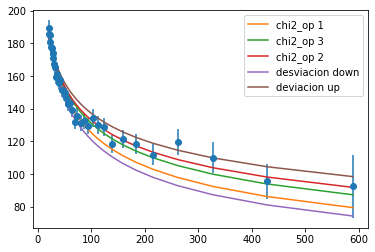

In [7]:
import matplotlib.pyplot as plt
plt.errorbar(Emed,(Emed**3)*flux,yerr = (Emed**3)*stdev_squared_sum,fmt = "o" )
plt.plot(Emed,(Emed**3)*(410.15882460040467* Emed**(-3.25725096386859)),label ="chi2_op 1")
plt.plot(Emed,(Emed**3)*(377.9017398323466* Emed**(-3.229656107029449)),label ="chi2_op 3")
plt.plot(Emed,(Emed**3)*(349.4899069198133* Emed**(-3.2094614670467227)),label="chi2_op 2")
plt.plot(Emed,(Emed**3)*(430.2154304665551* Emed**(-3.2752632445967365)),label="desviacion down")
plt.plot(Emed,(Emed**3)*(325.5394509920646* Emed**(-3.1874802159883884)),label="deviacion up")

#plt.plot(Emed,flux)
plt.legend()
plt.plot()
plt.show()

In [ ]:
chi_ups=[]

In [ ]:
for k in range(0,10000):
    x=0
    selector_x(porcentaje=50,error = 10)

In [ ]:
for i in range(0,len(chi_ups)):
    plt.errorbar(chi_ups[i][0],chi_ups[i][2],fmt="o")
    plt.show

In [ ]:
for i in range(0,len(chi_ups)):
    plt.errorbar(chi_ups[i][1],chi_ups[i][2],fmt="o")
    plt.show

In [ ]:
for i in range(0,len(chi_ups)):
    plt.errorbar(chi_ups[i][1],chi_ups[i][0],fmt="o")
    plt.show